In [1]:
#directories
import os
try:
    parentdir
except NameError:
    parentdir=os.getcwd()
else:
    parentdir = parentdir
print('The working directory is parentdir: %s' %parentdir)
#===========import===============modules
#import modules
import numpy as np
import pandas as pd
import phconvert as phc
import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

The working directory is parentdir: /home/biswajit/Research/Reports_ppt/reports/binfree-MS2/inter_photon_repo


In [28]:
os.chdir(parentdir)
%run pt3t3r_to_hdf5.py
%run pycorrelate.py

# 70%sucrose_50nmAlexa647_200mMMV_55%

In [65]:
os.chdir(parentdir)
gnr1_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_200mMMV_55%/gnr1_Point_29.t3r');
gnr3_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_200mMMV_55%/gnr3_Point_31.t3r');
gnr5_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_200mMMV_55%/gnr5_Point_33.t3r');
gnr7_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_200mMMV_55%/gnr7_Point_35.t3r');
gnrSurface_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_200mMMV_55%/surface.t3r');
gnr3_hepesIRF_t3r = os.path.abspath('data/20150408-09_3d/hepes_55%/gnr3_Point_3.t3r');
all_t3rfiles_alexa_200mMMV  = [gnr1_t3r, gnr3_t3r, gnr5_t3r, gnr7_t3r, gnrSurface_t3r, gnr3_hepesIRF_t3r];

### testing a file

In [ ]:
#converting and loading t3r file
os.chdir(parentdir)
file_path_hdf5 = t3r_to_hdf5(filename=gnr3_t3r);
h5 = h5py.File(file_path_hdf5);
unit = h5['photon_data']['timestamps_specs']['timestamps_unit'].value;
tcspc_unit = h5['photon_data']['nanotimes_specs']['tcspc_unit'].value;
#checking detectors
detectors = h5['photon_data']['detectors'];
timestamps = h5['photon_data']['timestamps'];
print("Detector    Counts")
print("--------   --------")
for det, count in zip(*np.unique(detectors, return_counts=True)):
    print("%8d   %8d" % (det, count));
# Plotting a trace
# num_ph = int(3e6);
# t = h5['photon_data']['timestamps'][...][h5['photon_data']['detectors'][...] == 1];
# t_mic = h5['photon_data']['nanotimes'][...][h5['photon_data']['detectors'][...] == 1];
# bintime=10e-3 #in sec
# bins = int((max(t*unit)-min(t*unit))/bintime)
# binned_trace = np.histogram(t*unit, bins=bins)
# plt.plot(binned_trace[1][:-1], binned_trace[0], 'b')
# plt.show()

## plot all time traces

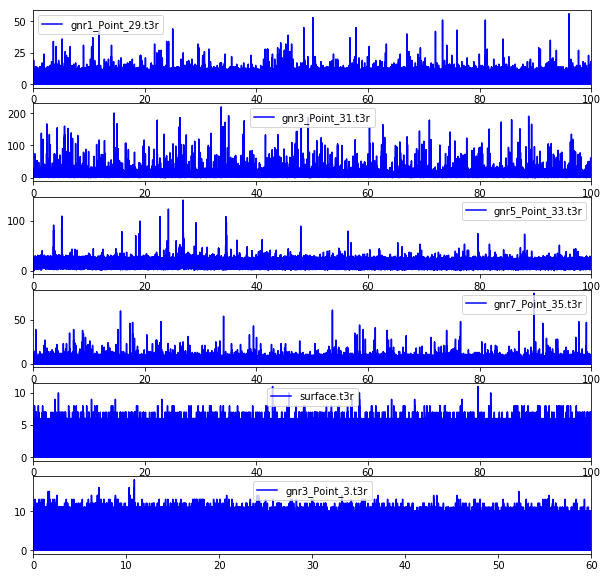

In [74]:
bintime=0.1e-3 #in sec
fig, ax = plt.subplots(figsize = (10, 10));
for i in range(len(all_t3rfiles_alexa_200mMMV)):
    t3rfile = all_t3rfiles_alexa_200mMMV[i];
    t3rfile_name = os.path.basename(t3rfile);
    file_path_hdf5 = t3r_to_hdf5(filename=t3rfile);
    h5 = h5py.File(file_path_hdf5);
    unit = h5['photon_data']['timestamps_specs']['timestamps_unit'][...];
    tcspc_unit = h5['photon_data']['nanotimes_specs']['tcspc_unit'][...];
    t = h5['photon_data']['timestamps'][...][h5['photon_data']['detectors'][...] == 1];
    bins = int((max(t*unit)-min(t*unit))/bintime)
    binned_trace = np.histogram(t*unit, bins=bins)
    ax = plt.subplot(len(all_t3rfiles_alexa_200mMMV),1,i+1)
    ax.plot(binned_trace[1][:-1], binned_trace[0], 'b', label=t3rfile_name)
    ax.set_xlim(min(binned_trace[1]), max(binned_trace[1]))
    ax.set_ylim(0, None)
    ax.legend()70%sucrose_50nmAlexa647_55%_200mMMV_again

## Plot all lifetimes and int_photon

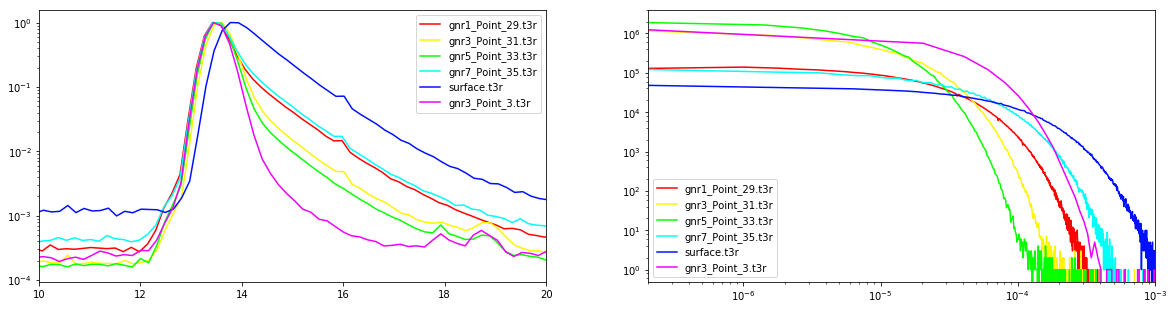

In [76]:
bins_nanotime = 300; bins_intphoton=500;
fig = plt.figure(figsize = (20, 5));
cmap = plt.get_cmap('hsv')#jet_r
N=len(all_t3rfiles_alexa_200mMMV)
nrows=1;ncols=2;
ax00=plt.subplot2grid((nrows, ncols), (0,0));
ax01=plt.subplot2grid((nrows, ncols), (0,1));
for i in range(len(all_t3rfiles_alexa_200mMMV)):
    color = cmap(float(i)/N)
    t3rfile = all_t3rfiles_alexa_200mMMV[i];
    t3rfile_name = os.path.basename(t3rfile);
    file_path_hdf5 = t3r_to_hdf5(filename=t3rfile);
    h5 = h5py.File(file_path_hdf5);
    unit = h5['photon_data']['timestamps_specs']['timestamps_unit'][...];
    tcspc_unit = h5['photon_data']['nanotimes_specs']['tcspc_unit'][...];
    t = h5['photon_data']['timestamps'][...][h5['photon_data']['detectors'][...] == 1];
    nanotimes = h5['photon_data']['nanotimes'][...][h5['photon_data']['detectors'][...] == 1];
    #=======lifetime plot=======
    nanotimes = 1e9*nanotimes*tcspc_unit;#convert to ns
    nanotimes = max(nanotimes)-nanotimes
    hist, bin_edges = np.histogram(nanotimes,bins=bins_nanotime)
    ax00.plot(bin_edges[4:-1], hist[4:]/max(hist), color=color, label=t3rfile_name)
    ax00.set_yscale('log');
    ax00.set_xlim(10, 20)
    ax00.legend()
    #=======interphoton plot========
    t = t*unit#convert to sec
    int_photon = np.diff(t);
    hist, bin_edges = np.histogram(int_photon, bins=bins_intphoton)
    ax01.plot(bin_edges[:-1], hist, color=color, label=t3rfile_name)#hist/max(hist)
    ax01.set_yscale('log');
    ax01.set_xscale('log');
    ax01.set_xlim(0, 0.001);
    ax01.set_xlabel
    ax01.legend()

# 70%sucrose_50nmAlexa647_55%_200mMMV_again

In [77]:
os.chdir(parentdir)
gnr1_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_55%_200mMMV_again/gnr1_Point_36.t3r');
gnr3_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_55%_200mMMV_again/gnr3_Point_38.t3r');
gnr5_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_55%_200mMMV_again/gnr5_Point_40.t3r');
gnr7_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_55%_200mMMV_again/gnr7_Point_42.t3r');
gnrSurface_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_55%_200mMMV_again/surface_2.t3r');
gnr3_hepesIRF_t3r = os.path.abspath('data/20150408-09_3d/hepes_55%/gnr3_Point_3.t3r');
all_t3rfiles_alexa_200mMMV_again  = [gnr1_t3r, gnr3_t3r, gnr5_t3r, gnr7_t3r, gnrSurface_t3r, gnr3_hepesIRF_t3r];

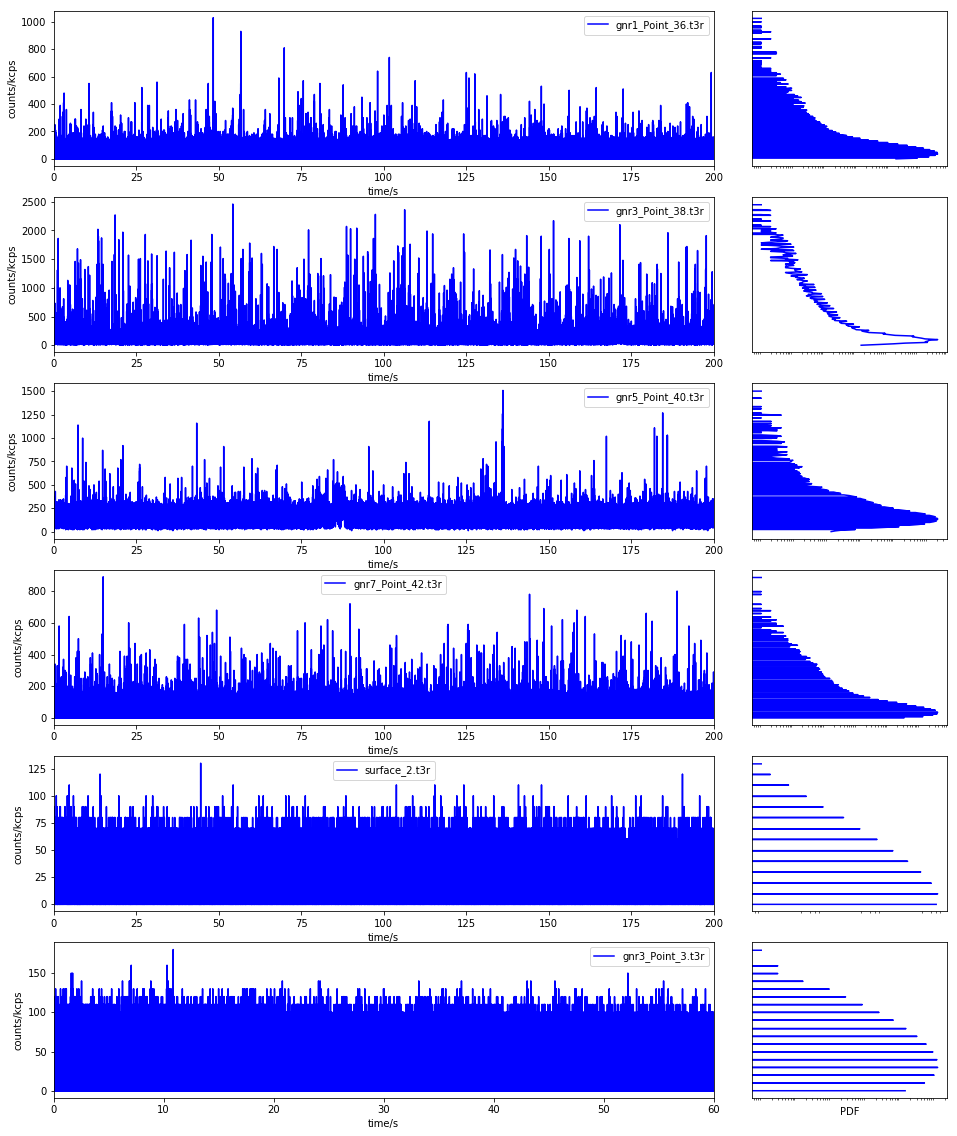

In [100]:
%run alexa647_analysis.py
timetrace_hist_folder(all_t3rfiles_alexa_200mMMV_again, bintime=0.1e-3, time_lim=(None, None), figsize=(16, 20))